# Working File - Alanis Perez

In [64]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in file
house_df = pd.read_csv("Data/house_sales.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Missing values for sqft_living

In [7]:
# Fill missing values for sqft_living
house_df['sqft_living'] = house_df['sqft_living'].fillna(house_df['sqft_above'] + house_df['sqft_basement'])

# Check for missing values
print(f"sqft_living missing values: {house_df['sqft_living'].isnull().sum()}")

sqft_living missing values: 0


### Missing values for bedrooms and bathrooms

In [11]:
# Use sqft_living bins to fill missing values for bedroom and bathroom
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, float('inf')]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+']
house_df['sqft_bin'] = pd.cut(house_df['sqft_living'], bins=bins, labels=labels)

In [15]:
# Drop rows with missing values in the relevant columns just for the calculation
grouped_avgs = house_df.dropna(subset=['bedrooms', 'bathrooms']).groupby('sqft_bin')[['bedrooms', 'bathrooms']].mean().round()
print(grouped_avgs)

           bedrooms  bathrooms
sqft_bin                      
0-1000          2.0        1.0
1000-2000       3.0        2.0
2000-3000       4.0        2.0
3000-4000       4.0        3.0
4000-5000       4.0        3.0
5000-6000       5.0        4.0
6000+           5.0        5.0


In [17]:
# Create dictionaries from the grouped_avgs to map bins to fill missing values with
bed_avg = grouped_avgs['bedrooms'].to_dict()
bath_avg = grouped_avgs['bathrooms'].to_dict()

# Fill missing values for bedrooms
house_df.loc[house_df['bedrooms'].isna(), 'bedrooms'] = (
    house_df.loc[house_df['bedrooms'].isna(), 'sqft_bin'].map(bed_avg))

# Fill missing values for bathrooms
house_df.loc[house_df['bathrooms'].isna(), 'bathrooms'] = (
    house_df.loc[house_df['bathrooms'].isna(), 'sqft_bin'].map(bath_avg))

In [31]:
# Check for missing values
print(f"bedrooms missing values: {house_df['bedrooms'].isnull().sum()}")
print(f"bathrooms missing values: {house_df['bathrooms'].isnull().sum()}")

bedrooms missing values: 0
bathrooms missing values: 0


### Checking bedroom outliers

In [57]:
# Checking bedrooms for outliers
print(f"bedroom values: {sorted(house_df['bedrooms'].unique())}")

bedroom values: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 33.0]


<Axes: ylabel='bedrooms'>

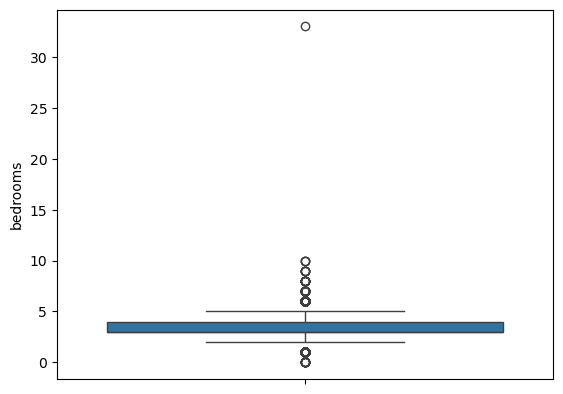

In [35]:
# Bedrooms boxplot
sns.boxplot(house_df['bedrooms'])

In [37]:
# Count of how many homes have an outlier value of bedrooms
print(f"Over 10 bedrooms: {(house_df['bedrooms'] > 10).sum()}")
print(f"10 bedrooms: {(house_df['bedrooms'] == 10).sum()}")
print(f"9 bedrooms: {(house_df['bedrooms'] == 9).sum()}")
print(f"8 bedrooms: {(house_df['bedrooms'] == 8).sum()}")
print(f"7 bedrooms: {(house_df['bedrooms'] == 7).sum()}")
print(f"6 bedrooms: {(house_df['bedrooms'] == 6).sum()}")
print(f"1 bedrooms: {(house_df['bedrooms'] == 1).sum()}")
print(f"0 bedrooms: {(house_df['bedrooms'] == 0).sum()}")

Over 10 bedrooms: 1
10 bedrooms: 3
9 bedrooms: 5
8 bedrooms: 12
7 bedrooms: 34
6 bedrooms: 263
1 bedrooms: 189
0 bedrooms: 11


In [43]:
# Drop outlier values of bedrooms (0, 7, 8, 9, 10, 33)
bedroom_clean = house_df.drop(house_df[house_df['bedrooms'].isin([0, 7, 8, 9, 10, 33])].index)
sorted(bedroom_clean['bedrooms'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

### Checking bathroom outliers

In [60]:
# Checking bathrooms for outliers
print(f"bathroom values: {sorted(bedroom_clean['bathrooms'].unique())}")

bathroom values: [0.0, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.75, 8.0]


In [66]:
# Adjusting bathroom values to be whole or half (no 0.25 or 0.75 values)
def clean_bathroom_value(x):
    # 0.25 values will be rounded down to nearest whole value
    decimal = x % 1
    if decimal == 0.25: 
        return np.floor(x) # floor rounds down
    # 0.75 values will be rounded up to nearest whole value
    elif decimal == 0.75:
        return np.ceil(x) # ceil rounds up
    else:
        return x

# Apply function
bedroom_clean['bathrooms'] = bedroom_clean['bathrooms'].apply(clean_bathroom_value)

# Check if function worked
print(f"bathroom values: {sorted(bedroom_clean['bathrooms'].unique())}")

bathroom values: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 8.0]


<Axes: ylabel='bathrooms'>

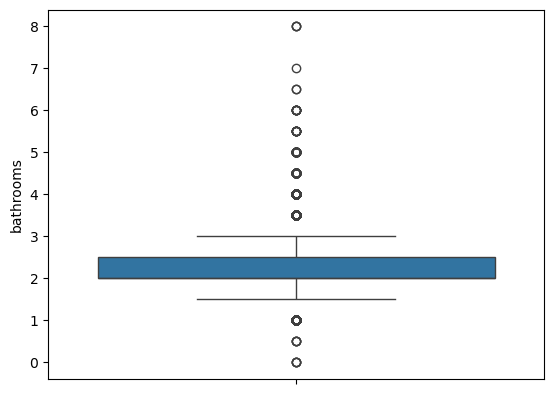

In [68]:
# Bathrooms boxplot
sns.boxplot(bedroom_clean['bathrooms'])

In [85]:
# Count of how many homes have an outlier value of bathrooms
print(f"More than 6 bathrooms: {(bedroom_clean['bathrooms'] > 6).sum()}")
print(f"Less than 1 bathroom: {(bedroom_clean['bathrooms'] < 1).sum()}")

More than 6 bathrooms: 6
Less than 1 bathroom: 8


In [95]:
# Drop outlier values for bathrooms
bathroom_clean = bedroom_clean[(bedroom_clean['bathrooms'] >= 1) & (bedroom_clean['bathrooms'] <= 6)]
sorted(bathroom_clean['bathrooms'].unique())

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]

### Missing values for sqft_lot

In [209]:
# Replace missing 'sqft_lot' values with the averaged 'sqft_lot15' values
bathroom_clean['sqft_lot'] = bathroom_clean['sqft_lot'].fillna(bathroom_clean['sqft_lot15'])

print(f"sqft_lot missing values: {bathroom_clean['sqft_lot'].isnull().sum()}")

sqft_lot missing values: 0


In [213]:
bathroom_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bin         0
dtype: int64

### New dataframe with adjusted values (if needbe)

In [215]:
# Create new clean house dataframe with changes made
house_clean = bathroom_clean[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                              'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                              'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]

In [224]:
house_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3.0,1.0,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3.0,2.0,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2.0,1.0,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4.0,3.0,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3.0,2.0,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.5,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000.0,4.0,2.5,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101.0,2.0,1.0,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000.0,3.0,2.5,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [222]:
house_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21533 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21533 non-null  int64  
 1   date           21533 non-null  object 
 2   price          21533 non-null  float64
 3   bedrooms       21533 non-null  float64
 4   bathrooms      21533 non-null  float64
 5   sqft_living    21533 non-null  float64
 6   sqft_lot       21533 non-null  float64
 7   floors         21533 non-null  float64
 8   waterfront     21533 non-null  int64  
 9   view           21533 non-null  int64  
 10  condition      21533 non-null  int64  
 11  grade          21533 non-null  int64  
 12  sqft_above     21533 non-null  int64  
 13  sqft_basement  21533 non-null  int64  
 14  yr_built       21533 non-null  int64  
 15  yr_renovated   21533 non-null  int64  
 16  zipcode        21533 non-null  int64  
 17  lat            21533 non-null  float64
 18  long       

In [262]:
# Convert date into datetime dtype
house_clean['date'] = pd.to_datetime(house_clean['date'], format='%Y%m%dT%H%M%S')

# Remove the hours, minutes, and second -- keep only year, month, day
house_clean['date'] = house_clean['date'].dt.date

In [264]:
# Convert bedrooms, sqft_living, and sqft_lot into int
house_clean['bedrooms'] = house_clean['bedrooms'].astype('int64')
house_clean['sqft_living'] = house_clean['sqft_living'].astype('int64')
house_clean['sqft_lot'] = house_clean['sqft_lot'].astype('int64')

In [284]:
# Run correlations
house_w_basements = house_clean[(house_clean['sqft_basement'] > 0)] # Remove houses without basement
house_corr = house_w_basements[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement']]
house_corr.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
price,1.000000,0.258068,0.500294,0.703862,0.062602,0.343925,0.313183,0.450005,0.072745,0.693451,0.704981,0.395954
bedrooms,0.258068,1.000000,0.448244,0.520277,0.063404,0.059936,-0.000412,0.106389,0.073541,0.269651,0.422708,0.464609
bathrooms,0.500294,0.448244,1.000000,0.679438,0.119290,0.422107,0.087785,0.237085,-0.040035,0.598484,0.663081,0.412684
sqft_living,0.703862,0.520277,0.679438,1.000000,0.210646,0.321004,0.146422,0.369012,0.026657,0.729540,0.915811,0.712430
sqft_lot,0.062602,0.063404,0.119290,0.210646,1.000000,-0.016505,0.047530,0.053413,0.001947,0.118356,0.193708,0.148680
floors,0.343925,0.059936,0.422107,0.321004,-0.016505,1.000000,0.050323,0.128657,-0.166172,0.457988,0.496285,-0.124802
waterfront,0.313183,-0.000412,0.087785,0.146422,0.047530,0.050323,1.000000,0.368822,0.012151,0.129771,0.133598,0.105184
view,0.450005,0.106389,0.237085,0.369012,0.053413,0.128657,0.368822,1.000000,0.029917,0.378134,0.332009,0.273268
condition,0.072745,0.073541,-0.040035,0.026657,0.001947,-0.166172,0.012151,0.029917,1.000000,-0.093578,-0.061490,0.169093
grade,0.693451,0.269651,0.598484,0.729540,0.118356,0.457988,0.129771,0.378134,-0.093578,1.000000,0.758288,0.362194


In [288]:
house_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,2014-12-09,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.5,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,2015-02-23,400000.0,4,2.5,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,2014-06-23,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,2015-01-16,400000.0,3,2.5,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [290]:
house_clean.to_csv('Data/house_updated.csv', index=False)